<h4>v 1.0</h4>


<h5>Assumptions</h5>
<ul>
    <li>Stocks have an average return each day and increase in price by this much with Gaussian distributed noise.</li>
    <li>Funds cannot affect the market price.</li>
    <li>Funds have a randomly weighted 'preference' for profit and risk (risk profile).</li>
    <li>Funds assess stocks and estimate their profit/risk.</li>
    <li>The estimate is affected by Gaussian noise, distributed around the true value, the width of which is determined by two skill ratings, one for profit, one for risk.</li>
    <li>There is no diversification, so funds just assess the best stock on day one and spend all their money on that. This is totally how this sort of thing works trust me some guy on reddit told me so and he was really smart.</li>
</ul>

In [1]:
from World import World
from Fund import Fund
from Stock import Stock
import utils

import numpy
import matplotlib.pyplot as plt

Set up World:

In [2]:
w = World(100, 100)
w.run(1)

Plot difference in estimates for best and worst Fund:

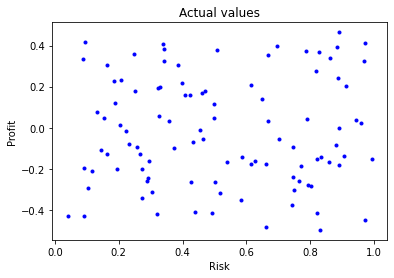

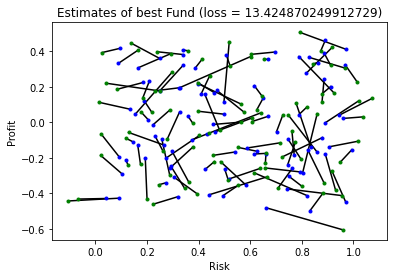

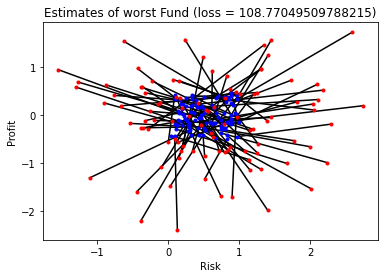

In [45]:
# Best and worst Funds by total skill rating
best = utils.getBestFund(w)
worst = utils.getWorstFund(w)

stocks = w.stocks
# Actual profit, risk values:
stockValues = numpy.array([[s.profit, s.risk] for s in stocks])
# Estimates of best fund
bestEstimates = numpy.array(utils.getEstimates(best, stocks)).T
# Estimates of worst fund
worstEstimates = numpy.array(utils.getEstimates(worst, stocks)).T

plt.plot(stockValues[:,1], stockValues[:,0], 'b.')
plt.xlabel('Risk')
plt.ylabel('Profit')
plt.title('Actual values')
plt.show()



totalError = 0
for i in range(0, len(stockValues)):
    profitValues = numpy.array([stockValues[i][0], bestEstimates[i][0]])
    riskValues = numpy.array([stockValues[i][1], bestEstimates[i][1]])
    plt.plot(riskValues, profitValues, 'k-')
    totalError +=  numpy.linalg.norm(stockValues[i,:] - bestEstimates[i,:])
    
plt.plot(stockValues[:,1], stockValues[:,0], 'b.')
plt.plot(bestEstimates[:,1], bestEstimates[:,0], 'g.')
    
plt.xlabel('Risk')
plt.ylabel('Profit')
plt.title('Estimates of best Fund (loss = ' + str(totalError) + ')')    
plt.show()



totalError = 0
for i in range(0, len(stockValues)):
    profitValues = numpy.array([stockValues[i][0], worstEstimates[i][0]])
    riskValues = numpy.array([stockValues[i][1], worstEstimates[i][1]])
    plt.plot(riskValues, profitValues, 'k-')
    totalError +=  numpy.linalg.norm(stockValues[i,:] - worstEstimates[i,:])

plt.plot(stockValues[:,1], stockValues[:,0], 'b.')
plt.plot(worstEstimates[:,1], worstEstimates[:,0], 'r.')
    
plt.xlabel('Risk')
plt.ylabel('Profit')
plt.title('Estimates of worst Fund (loss = ' + str(totalError) + ')')
plt.show()

Clearly, the Fund with the better skills estimates the Stocks better. Some of the estimates are obviously inaccurate, with risk values below 0.

Find Funds with good and bad skills and plot Stocks bought by them:

Text(0, 0.5, 'Profit')

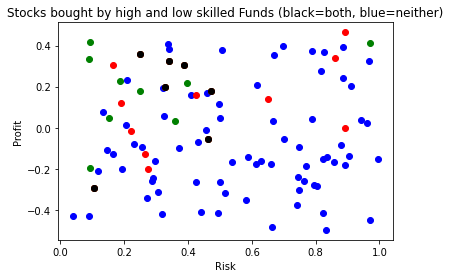

In [82]:
# Find Stocks bought by 'good'  and 'bad' Funds
goodStocks = []
badStocks = []
for f in w.funds:
    if f.riskSkill > 5 and f.profitSkill > 5:
        for s in f.stocks:
            goodStocks.append(s)
    elif f.riskSkill < 5 and f.profitSkill < 5:
        for s in f.stocks:
            badStocks.append(s)
            
goodStocks = list(set(goodStocks))
badStocks = list(set(badStocks))

# Find stocks bought by both
both = []
neither = []
for s in w.stocks:
    if s in goodStocks and s in badStocks:
        both.append(s)
    elif s not in goodStocks and s not in badStocks:
        neither.append(s)
      
plt.plot([s.risk for s in neither], [s.profit for s in neither], 'bo')
plt.plot([s.risk for s in goodStocks], [s.profit for s in goodStocks], 'go')
plt.plot([s.risk for s in badStocks], [s.profit for s in badStocks], 'ro')
plt.plot([s.risk for s in both], [s.profit for s in both], 'ko')

plt.title('Stocks bought by high and low skilled Funds (black=both, blue=neither)')

plt.xlabel('Risk')
plt.ylabel('Profit')

It looks as though the best Stocks, with high profit and low risk (in the top-left corner) tend to be bought by the most highly-skilled Funds, as one would expect.